In [1]:
# 安装库
!pip install scikit-learn -q

# 导入所需包
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# 上传并读取文件
from google.colab import files
uploaded = files.upload()

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# 显示前几行确认
df.head()


Saving amazon_reviews_final_cleaned_v2.csv to amazon_reviews_final_cleaned_v2.csv


,brand,text,created_at,label,rating,lang,cleaned_text
0,Apple,"No charger. Every thing is good about iPhones,...",2024-11-08,positive,4,en,charger every thing good iphones theres nothin...
1,Apple,"iPhone 13 256GB. It look so fabulous, I am and...",2024-08-16,positive,5,en,iphone gb look fabulous android user switched ...
2,Apple,Flip camera option nill. I tried to flip camer...,2024-05-14,positive,4,en,flip camera option nill tried flip camera reco...
3,Apple,Good product. Happy to get the iPhone 13 in Am...,2024-05-18,positive,5,en,good product happy get iphone amazon offer
4,Apple,Too smooth and effective battery life. 5 star ...,2024-05-14,positive,5,en,smooth effective battery life star


TF-IDF

In [2]:
# 第二步：按品牌提取 TF-IDF 关键词
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 自定义函数：提取每个品牌前 N 个关键词
def extract_top_tfidf_words(texts, top_n=20):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)
    tfidf_scores = X.sum(axis=0).A1  # 每个词的总权重
    words = vectorizer.get_feature_names_out()
    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    top_words = [(words[i], tfidf_scores[i]) for i in top_indices]
    return top_words

# 获取所有品牌
brands = df["brand"].unique()

# 按品牌提取关键词
brand_keywords = {}

for brand in brands:
    texts = df[df["brand"] == brand]["cleaned_text"].dropna().astype(str).tolist()
    top_words = extract_top_tfidf_words(texts, top_n=20)
    brand_keywords[brand] = top_words

# 展示每个品牌的关键词
for brand, keywords in brand_keywords.items():
    print(f"\n {brand} Palabras clave de alta frecuencia (TF-IDF Top 20)：")
    for word, score in keywords:
        print(f"{word}: {score:.4f}")



 Apple Palabras clave de alta frecuencia (TF-IDF Top 20)：
phone: 141.9388
good: 141.1892
iphone: 106.7945
quality: 83.5836
product: 81.4995
battery: 80.4714
camera: 75.3286
great: 60.4462
buy: 56.8103
best: 53.7251
apple: 52.4758
amazon: 46.6947
like: 46.5674
new: 45.4050
nice: 44.6476
price: 39.7578
excellent: 37.5495
life: 34.1888
android: 34.0960
condition: 32.8930

 samsung Palabras clave de alta frecuencia (TF-IDF Top 20)：
phone: 2445.7953
stars: 2174.1181
great: 1359.4982
good: 1045.4964
love: 762.5207
new: 660.3457
price: 633.9423
works: 600.6949
like: 586.5435
buy: 585.2482
battery: 552.7445
screen: 538.1376
samsung: 533.6601
use: 453.1438
product: 428.9385
star: 416.0472
work: 408.5703
excellent: 375.7697
quality: 375.6964
note: 373.2188

 Xiaomi Palabras clave de alta frecuencia (TF-IDF Top 20)：
good: 235.4332
phone: 222.7595
camera: 178.7520
quality: 164.4738
price: 137.7610
battery: 127.0286
mobile: 109.4769
best: 102.5965
product: 99.3927
buy: 84.0409
redmi: 79.5678
note:


 Tiempo total dedicado a la extracción de palabras clave TF-IDF：1.52 segundo


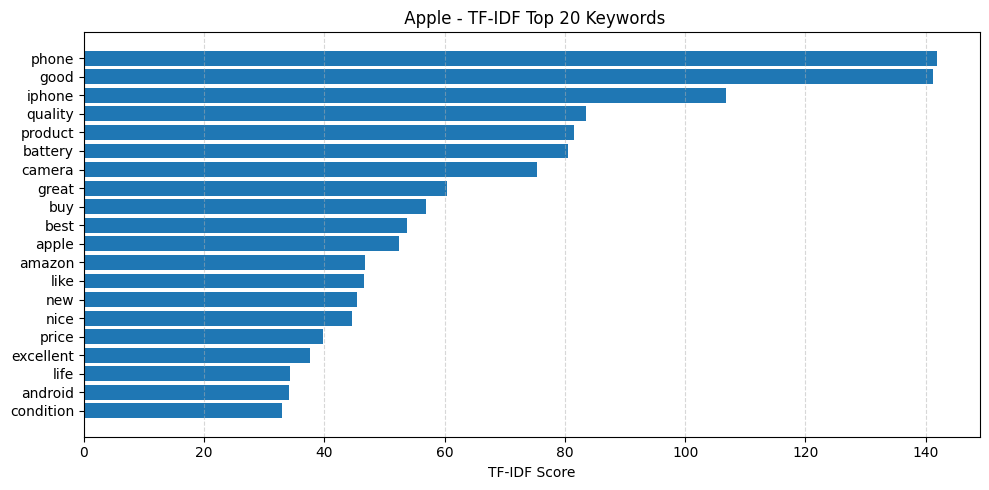

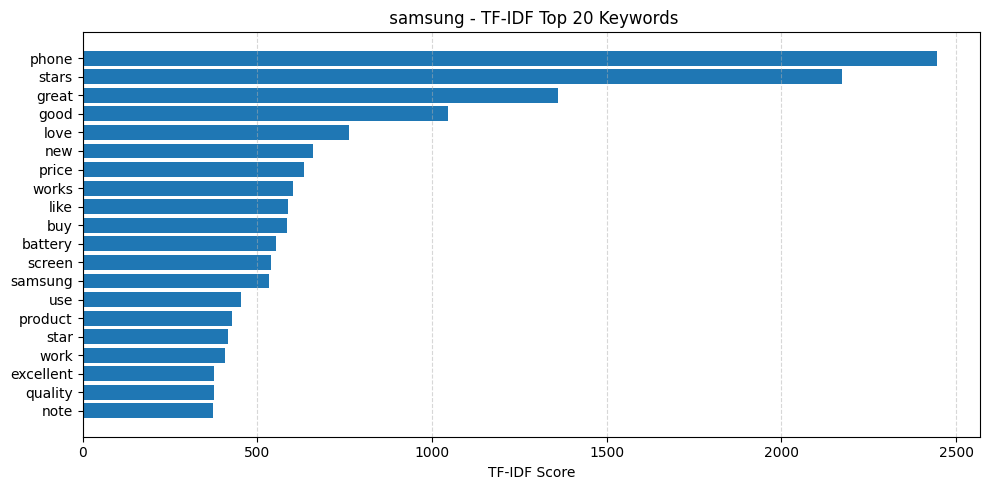

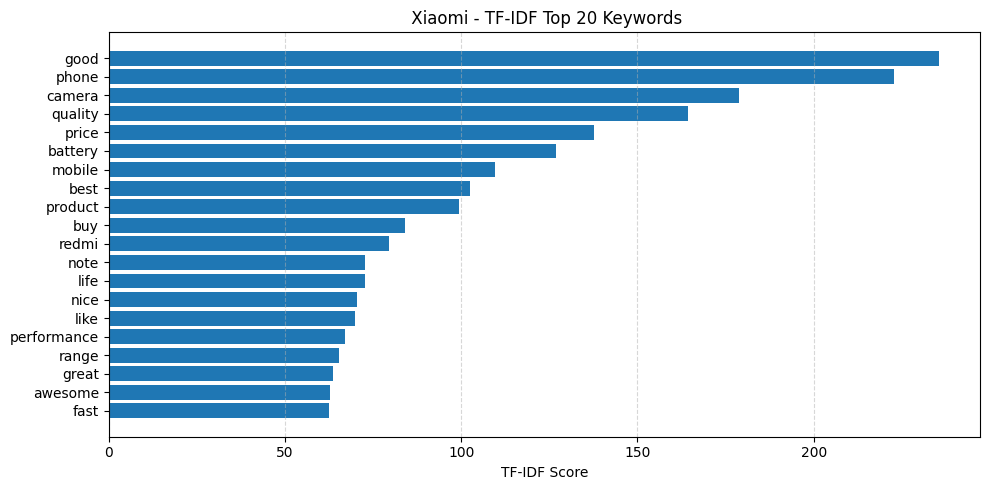

In [3]:
# 安装所需库（如果未安装）
!pip install matplotlib -q

# 导入工具
import time
import matplotlib.pyplot as plt

#  记录开始时间
start_time = time.time()

# 第一步：按品牌提取关键词（你已有代码）
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

def extract_top_tfidf_words(texts, top_n=20):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    X = vectorizer.fit_transform(texts)
    tfidf_scores = X.sum(axis=0).A1
    words = vectorizer.get_feature_names_out()
    top_indices = tfidf_scores.argsort()[::-1][:top_n]
    top_words = [(words[i], tfidf_scores[i]) for i in top_indices]
    return top_words

brands = df['brand'].unique()
brand_keywords = {}

for brand in brands:
    texts = df[df['brand'] == brand]['cleaned_text'].dropna().astype(str).tolist()
    top_words = extract_top_tfidf_words(texts, top_n=20)
    brand_keywords[brand] = top_words

#  记录结束时间
end_time = time.time()
print(f"\n Tiempo total dedicado a la extracción de palabras clave TF-IDF：{end_time - start_time:.2f} segundo")

#  可视化：绘制每个品牌前20词条的条形图
for brand, keywords in brand_keywords.items():
    words, scores = zip(*keywords)
    plt.figure(figsize=(10, 5))
    plt.barh(words[::-1], scores[::-1])
    plt.title(f" {brand} - TF-IDF Top 20 Keywords")
    plt.xlabel("TF-IDF Score")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


 BERTopic

In [4]:
# 安装 BERTopic（如果未安装）
!pip install bertopic -q
!pip install umap-learn -q
!pip install hdbscan -q

# 导入所需库
from bertopic import BERTopic
import pandas as pd

# 准备建模文本（确保每个 brand 单独建模）
df_twitter = df[df['brand'].isin(['Apple', 'samsung', 'Xiaomi'])]  # 可选，只取三品牌


In [5]:
from bertopic import BERTopic

# 存储每个品牌的模型和结果
brand_models = {}
brand_topics_info = {}

# 获取品牌列表
brands = df_twitter['brand'].unique()

for brand in brands:
    print(f"\n🔍 正在建模品牌：{brand}")

    # 获取并清洗文本（去除空值、强制为字符串）
    texts = df_twitter[df_twitter['brand'] == brand]['cleaned_text']
    texts = texts.dropna().astype(str).tolist()

    print(f"📄 文本数量：{len(texts)}")

    # 创建并训练 BERTopic 模型
    topic_model = BERTopic(language="english", top_n_words=10, calculate_probabilities=False, verbose=False)
    topics, _ = topic_model.fit_transform(texts)

    # 存储模型和主题信息
    brand_models[brand] = topic_model
    brand_topics_info[brand] = topic_model.get_topic_info()

    # 显示前 5 个主题概览
    print(f"\n📌 {brand} 的前 5 个主题：")
    display(topic_model.get_topic_info().head(5))



🔍 正在建模品牌：Apple
📄 文本数量：1899

📌 Apple 的前 5 个主题：


,Topic,Count,Name,Representation,Representative_Docs
0,-1,621,-1_phone_good_aaa_iphone,"[phone, good, aaa, iphone, quality, battery, c...",[st purchase great one iphone daysit worst bat...
1,0,181,0_scratches_condition_battery_came,"[scratches, condition, battery, came, refurbis...","[quality purchase scratches like new, great pu..."
2,1,73,1_phone_great_happy_works,"[phone, great, happy, works, best, nice, gift,...",[sonas gift though big techy happy use easily ...
3,2,68,2_locked_stolen_verizon_unlocked,"[locked, stolen, verizon, unlocked, att, activ...",[unlocked tried activate refurbished unlocked ...
4,3,65,3_heating_issue_overheating_charging,"[heating, issue, overheating, charging, heated...",[battery heating problem charging much battery...



🔍 正在建模品牌：samsung
📄 文本数量：21724

📌 samsung 的前 5 个主题：


,Topic,Count,Name,Representation,Representative_Docs
0,-1,8463,-1_phone_battery_screen_great,"[phone, battery, screen, great, new, samsung, ...",[great phone heavy purchased amazon sprint net...
1,0,916,0_price_great_purchase_happy,"[price, great, purchase, happy, good, conditio...","[great phone price great phone price, great ph..."
2,1,659,1_charger_charge_charging_battery,"[charger, charge, charging, battery, came, cab...",[great phone factory charger phone good defect...
3,2,637,2_price_product_quality_buy,"[price, product, quality, buy, good, purchase,...","[great price great product, good price great p..."
4,3,613,3_unlocked_att_locked_unlock,"[unlocked, att, locked, unlock, tmobile, calli...","[buy phone unlocked, dont buy supposed tmobile..."



🔍 正在建模品牌：Xiaomi
📄 文本数量：2910

📌 Xiaomi 的前 5 个主题：


,Topic,Count,Name,Representation,Representative_Docs
0,-1,1166,-1_camera_good_phone_quality,"[camera, good, phone, quality, battery, redmi,...",[took around days get product delivered great ...
1,0,200,0_fingerprint_reader_finger_print,"[fingerprint, reader, finger, print, life, goo...",[fingerprint reader speed well good camera qua...
2,1,168,1_battery_charging_heating_phone,"[battery, charging, heating, phone, mobile, he...",[worst experience ever mangaed buy mobile fath...
3,2,132,2_price_product_good_range,"[price, product, good, range, value, best, mon...","[price range product good, good product price ..."
4,3,115,3_price_range_phone_best,"[price, range, phone, best, mobile, smartphone...","[best mobile phone price, best phone price ran..."


In [6]:
# 可视化每个品牌最常见的前5个主题词（柱状图）
for brand in brand_models:
    print(f"\n {brand} Gráficos de barras (5 temas principales)")
    fig = brand_models[brand].visualize_barchart(top_n_topics=5)
    fig.show()



 Apple Gráficos de barras (5 temas principales)



 samsung Gráficos de barras (5 temas principales)



 Xiaomi Gráficos de barras (5 temas principales)


In [7]:
# 提取前3个主题的关键词集合
brand_top_keywords = {}

for brand, model in brand_models.items():
    topics = model.get_topics()
    top_keywords = set()
    for topic_id in [0, 1, 2]:  # 主题编号从0开始
        if topic_id in topics:
            words = [word for word, _ in topics[topic_id][:10]]  # 取前10个关键词
            top_keywords.update(words)
    brand_top_keywords[brand] = top_keywords

# 交集和差集
brands = list(brand_top_keywords.keys())
for i in range(len(brands)):
    for j in range(i + 1, len(brands)):
        b1, b2 = brands[i], brands[j]
        common = brand_top_keywords[b1] & brand_top_keywords[b2]
        only_b1 = brand_top_keywords[b1] - brand_top_keywords[b2]
        only_b2 = brand_top_keywords[b2] - brand_top_keywords[b1]

        print(f"\n {b1} vs {b2} Comparación de palabras clave")
        print(f"Palabras clave comunes (Top3 temas): {sorted(common)}")
        print(f"{b1} Palabras clave únicas: {sorted(only_b1)}")
        print(f"{b2} Palabras clave únicas: {sorted(only_b2)}")



 Apple vs samsung Comparación de palabras clave
Palabras clave comunes (Top3 temas): ['battery', 'came', 'condition', 'excellent', 'great', 'happy', 'works']
Apple Palabras clave únicas: ['activate', 'att', 'best', 'big', 'capacity', 'carrier', 'gift', 'like', 'locked', 'new', 'nice', 'phone', 'refund', 'refurbished', 'scratch', 'scratches', 'screen', 'seller', 'stolen', 'superb', 'unlocked', 'verizon']
samsung Palabras clave únicas: ['accessories', 'awesome', 'box', 'buy', 'cable', 'charge', 'charger', 'charging', 'good', 'love', 'months', 'original', 'price', 'product', 'purchase', 'quality', 'shipping', 'value']

 Apple vs Xiaomi Comparación de palabras clave
Palabras clave comunes (Top3 temas): ['battery', 'best', 'nice', 'phone']
Apple Palabras clave únicas: ['activate', 'att', 'big', 'came', 'capacity', 'carrier', 'condition', 'excellent', 'gift', 'great', 'happy', 'like', 'locked', 'new', 'refund', 'refurbished', 'scratch', 'scratches', 'screen', 'seller', 'stolen', 'superb', '

In [8]:
import pandas as pd
from IPython.display import display

top_keywords_df = pd.DataFrame()

for brand, model in brand_models.items():
    topic_info = model.get_topic_info().head(1)  # Top 1主题（主题编号非-1）
    top_topic_id = topic_info.iloc[0]['Topic']
    keywords = model.get_topic(top_topic_id)
    keywords_list = [word for word, _ in keywords[:10]]  # 前10关键词

    row = pd.DataFrame({
        'Brand': [brand],
        'Top_Topic_ID': [top_topic_id],
        'Top_Keywords': [', '.join(keywords_list)]
    })

    top_keywords_df = pd.concat([top_keywords_df, row], ignore_index=True)

# 显示并导出表格
display(top_keywords_df)
top_keywords_df.to_csv("top_keywords_by_brand.csv", index=False)
print(" Se ha guardado una tabla de las palabras clave más importantes para cada marca como top_keywords_by_brand.csv")


,Brand,Top_Topic_ID,Top_Keywords
0,Apple,-1,"phone, good, aaa, iphone, quality, battery, ca..."
1,samsung,-1,"phone, battery, screen, great, new, samsung, l..."
2,Xiaomi,-1,"camera, good, phone, quality, battery, redmi, ..."


 Se ha guardado una tabla de las palabras clave más importantes para cada marca como top_keywords_by_brand.csv
